In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Sampler
from torchvision.models import alexnet, AlexNet_Weights
from AdaIN import AdaIN

In [2]:
an = alexnet(weights = AlexNet_Weights.DEFAULT)
print(an)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [8]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(256),
    transforms.ToTensor()
])

#coco content
train_content_dataset = datasets.ImageFolder(
    root= "../coco",             
    transform=transform
)

#wikiart
train_style_dataset = datasets.ImageFolder(
    root= "../archive",             
    transform=transform
)

train_content_loader = DataLoader(train_content_dataset, batch_size=1, shuffle=True)
train_style_loader = DataLoader(train_style_dataset, batch_size=1, shuffle=True)

#Remove final max pooling layer
encoder = nn.Sequential(*list(an.features.children())[:12])

decoder = nn.Sequential(    
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),

            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 64, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 64, 3),
            nn.ReLU(inplace=True),

            
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 3, 3),
    
        )


anModel = AdaIN()
anModel.uploadEncoder(encoder)
anModel.uploadDecoder(decoder)
anModel.epochTraining(train_content_loader, train_style_loader, "alexnet", steps = 20000, epoch = 5)


Epoch: 1
[1000/20000] content=0.2224 style=0.1379 total=0.360288
[2000/20000] content=0.2134 style=0.1128 total=0.326222
[3000/20000] content=0.2087 style=0.1071 total=0.315758
[4000/20000] content=0.2047 style=0.1021 total=0.306832
[5000/20000] content=0.1980 style=0.0975 total=0.295502
[6000/20000] content=0.2002 style=0.0991 total=0.299394
[7000/20000] content=0.1947 style=0.0936 total=0.288240
[8000/20000] content=0.1954 style=0.0936 total=0.288959
[9000/20000] content=0.1970 style=0.0945 total=0.291409
[10000/20000] content=0.1913 style=0.0906 total=0.281859
[11000/20000] content=0.1898 style=0.0893 total=0.279088
[12000/20000] content=0.1923 style=0.0909 total=0.283222
[13000/20000] content=0.1920 style=0.0907 total=0.282691
[14000/20000] content=0.1880 style=0.0870 total=0.274919
[15000/20000] content=0.1933 style=0.0898 total=0.283101
[16000/20000] content=0.1900 style=0.0881 total=0.278102
[17000/20000] content=0.1904 style=0.0876 total=0.278012
[18000/20000] content=0.1901 st

NameError: name 'image_path' is not defined

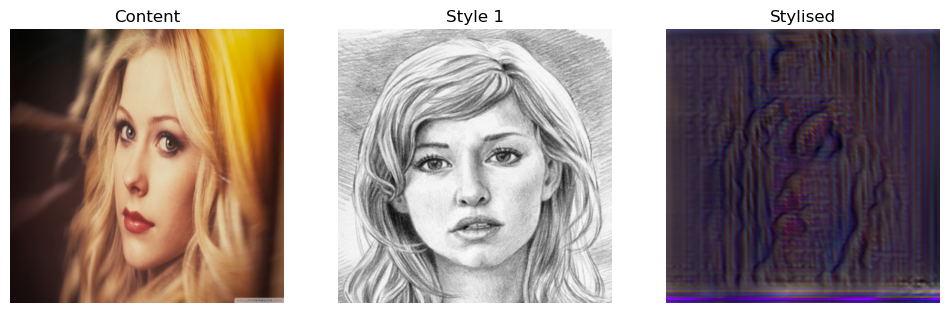

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.786, '127.026 ms')

In [10]:
style_path = "style/sketch.png"
image_path = "content/avril.jpg"


anModel.fit(image_path,[style_path])
anModel.pipeline()
anModel.displayImages()
anModel.evaluate()

Epoch: 1
[1000/20000] content=0.4768 style=0.1738 total=0.650609
[2000/20000] content=0.4466 style=0.1519 total=0.598462
[3000/20000] content=0.4540 style=0.1516 total=0.605685
[4000/20000] content=0.4389 style=0.1441 total=0.583069
[5000/20000] content=0.4610 style=0.1521 total=0.613119
[6000/20000] content=0.4546 style=0.1462 total=0.600766
[7000/20000] content=0.4399 style=0.1414 total=0.581346
[8000/20000] content=0.4407 style=0.1400 total=0.580776
[9000/20000] content=0.4332 style=0.1368 total=0.569999
[10000/20000] content=0.4494 style=0.1439 total=0.593280
[11000/20000] content=0.4403 style=0.1377 total=0.577985
[12000/20000] content=0.4339 style=0.1351 total=0.569053
[13000/20000] content=0.4446 style=0.1396 total=0.584142
[14000/20000] content=0.4379 style=0.1367 total=0.574616
[15000/20000] content=0.4405 style=0.1382 total=0.578687
[16000/20000] content=0.4385 style=0.1361 total=0.574633
[17000/20000] content=0.4305 style=0.1320 total=0.562456
[18000/20000] content=0.4420 st

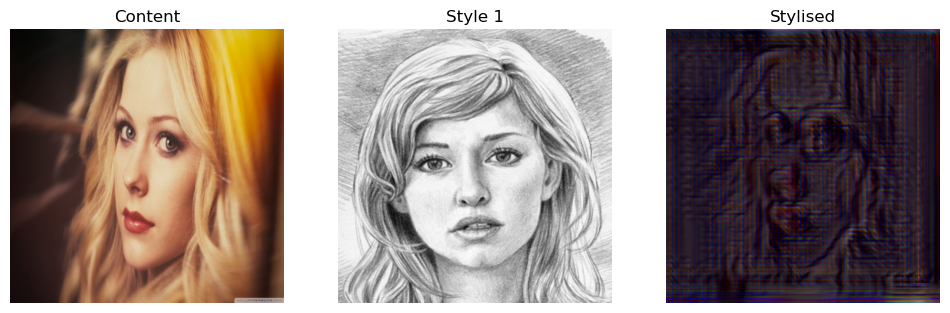

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.974, '127.695 ms')

In [12]:
encoder_new = nn.Sequential(*list(an.features.children())[:10])

anModel2 = AdaIN()
anModel2.uploadEncoder(encoder_new)
anModel2.uploadDecoder(decoder)
anModel2.epochTraining(train_content_loader, train_style_loader, "alexnet_relu4", steps = 20000, epoch = 5)
anModel2.fit(image_path,[style_path])
anModel2.pipeline()
anModel2.displayImages()
anModel2.evaluate()

Epoch: 1
[1000/20000] content=0.4465 style=0.2098 total=0.656349
[2000/20000] content=0.4327 style=0.1744 total=0.607131
[3000/20000] content=0.4221 style=0.1628 total=0.584949
[4000/20000] content=0.4188 style=0.1566 total=0.575410
[5000/20000] content=0.4307 style=0.1584 total=0.589133
[6000/20000] content=0.4129 style=0.1480 total=0.560897
[7000/20000] content=0.4285 style=0.1552 total=0.583739
[8000/20000] content=0.4093 style=0.1445 total=0.553794
[9000/20000] content=0.4175 style=0.1448 total=0.562284
[10000/20000] content=0.4263 style=0.1493 total=0.575576
[11000/20000] content=0.4254 style=0.1472 total=0.572545
[12000/20000] content=0.3997 style=0.1351 total=0.534793
[13000/20000] content=0.3963 style=0.1334 total=0.529729
[14000/20000] content=0.4153 style=0.1380 total=0.553312
[15000/20000] content=0.4028 style=0.1341 total=0.536837
[16000/20000] content=0.4062 style=0.1350 total=0.541147
[17000/20000] content=0.4100 style=0.1348 total=0.544871
[18000/20000] content=0.4159 st

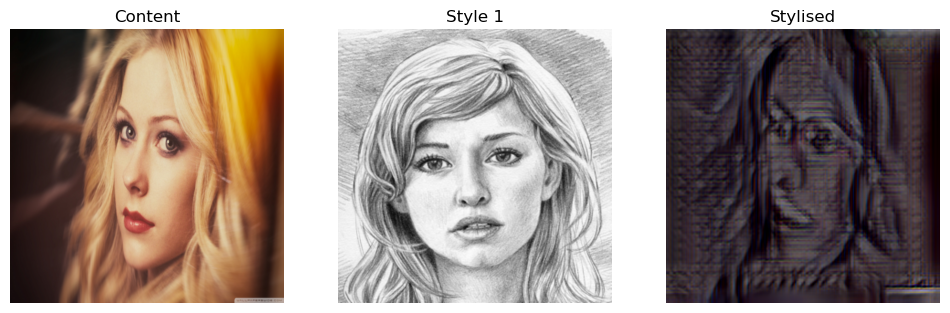

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


(0.829, '83.969 ms')

In [14]:
encoder_relu3 = nn.Sequential(*list(an.features.children())[:8])

decoder_new = nn.Sequential(    
            nn.ReflectionPad2d(1),
            nn.Conv2d(384, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),

            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(256, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 128, 3),
            nn.ReLU(inplace=True),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(128, 64, 3),
            nn.ReLU(inplace=True),
            
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 64, 3),
            nn.ReLU(inplace=True),

            
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 3, 3),
    
        )

anModel3 = AdaIN()
anModel3.uploadEncoder(encoder_relu3)
anModel3.uploadDecoder(decoder_new)
anModel3.epochTraining(train_content_loader, train_style_loader, "alexnet_relu3", steps = 20000, epoch = 5)
anModel3.fit(image_path,[style_path])
anModel3.pipeline()
anModel3.displayImages()
anModel3.evaluate()